In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from google.colab import drive
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

Load the downloaded dataset of **bank-full.csv** from google drive.



In [2]:
drive.mount('/content/drive/')
filename = ('/content/drive/MyDrive/courses/machine_learning/bank_marketing/bank/bank-full.csv')
Read = lambda filaname : pd.read_csv(filename, sep=";")

Mounted at /content/drive/


**Data preprocessing.**

In [5]:
def data_preprocessing(dataframe) :
  # S1.Detect the missing values of dataset and hanlde these values by deleting regarding items.
  # This dataset has none missing values so this step is skipped.
  #if (len(dataframe.isnull().sum())) :
  #  dataframe = dataframe.dropna()

  # S2.Convert non-numerical values to numerical values using map or onehot.
  convertion_map = {'yes': 1, 'no': 0}
  X = dataframe.drop('y', axis=1)
  y = dataframe['y'].map(convertion_map)
  X['default'] = dataframe['default'].map(convertion_map)
  X['housing'] = dataframe['housing'].map(convertion_map)
  X['loan'] = dataframe['loan'].map(convertion_map)
  categorical_cols = ['job', 'marital', 'education', 'contact', 'month', 'poutcome']
  ct = ColumnTransformer(transformers=[('cat', OneHotEncoder(), categorical_cols)], remainder='passthrough')
  X_transformed = ct.fit_transform(X)
  return X_transformed, y

In [6]:
df = Read(filename)
X_data,y = data_preprocessing(df)
# S3.split the dataset into multiple groups including training group and testing group.
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)

**Implement, and train the KNN classifier and predict data.**

评估模型

绘制混淆矩阵

Accuracy: 0.8834


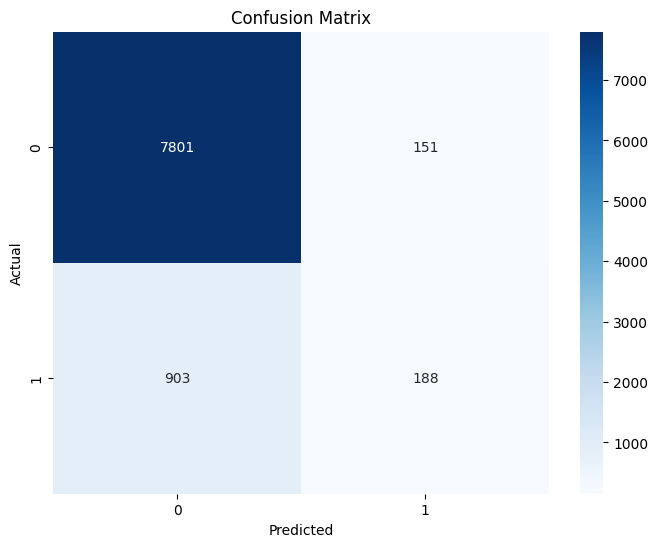

'\n这里有个问题，在run_knn方法内部执行逻辑回归，和在方法外部执行逻辑回归，得到的Accuracy不一致。所以，需要研究如何给逻辑回归的方法传参。\n-- Please Guangtian research it. <TODO>\n'

In [7]:
def run_knn(k):
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train, y_train)
  y_pred = knn.predict(X_test)
  return y_pred

def evaluation_model(y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  print(f"Accuracy: {accuracy:.4f}")
  return accuracy

def plot_confusion_matrix(y_pred):
  cm = confusion_matrix(y_test, y_pred)
  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
  plt.xlabel('Predicted')
  plt.ylabel('Actual')
  plt.title('Confusion Matrix')
  plt.show()

current_y_pred = run_knn(67)
evaluation_model(current_y_pred)
plot_confusion_matrix(current_y_pred)
#get_LogisticRegression()


'''
这里有个问题，在run_knn方法内部执行逻辑回归，和在方法外部执行逻辑回归，得到的Accuracy不一致。所以，需要研究如何给逻辑回归的方法传参。
-- Please Guangtian research it. <TODO>
'''

误差率与k的关系

AUC与k值的关系

交叉验证获取最佳k值

k: 1    Accuracy: 0.8497    AUC: 0.64
k: 3    Accuracy: 0.8716    AUC: 0.73
k: 5    Accuracy: 0.8755    AUC: 0.77
k: 7    Accuracy: 0.8788    AUC: 0.79
k: 9    Accuracy: 0.8798    AUC: 0.80
k: 11    Accuracy: 0.8801    AUC: 0.81
k: 13    Accuracy: 0.8830    AUC: 0.82
k: 15    Accuracy: 0.8832    AUC: 0.82
k: 17    Accuracy: 0.8839    AUC: 0.82
k: 19    Accuracy: 0.8823    AUC: 0.83
k: 21    Accuracy: 0.8837    AUC: 0.83
k: 23    Accuracy: 0.8848    AUC: 0.83
k: 25    Accuracy: 0.8846    AUC: 0.83
k: 27    Accuracy: 0.8857    AUC: 0.83
k: 29    Accuracy: 0.8860    AUC: 0.83
k: 31    Accuracy: 0.8860    AUC: 0.83
k: 33    Accuracy: 0.8869    AUC: 0.83
k: 35    Accuracy: 0.8859    AUC: 0.84
k: 37    Accuracy: 0.8865    AUC: 0.84
k: 39    Accuracy: 0.8852    AUC: 0.84
k: 41    Accuracy: 0.8852    AUC: 0.84
k: 43    Accuracy: 0.8847    AUC: 0.84
k: 45    Accuracy: 0.8850    AUC: 0.84
k: 47    Accuracy: 0.8842    AUC: 0.84
k: 49    Accuracy: 0.8850    AUC: 0.84
k: 51    Accuracy: 0.8842    A

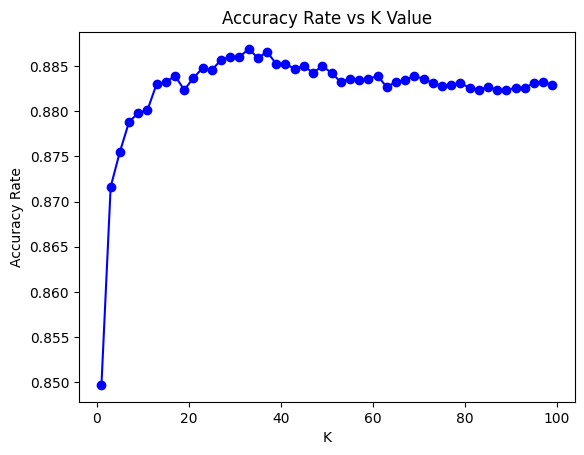

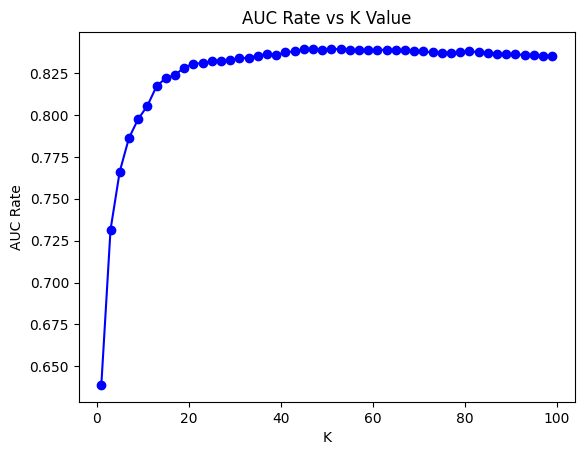

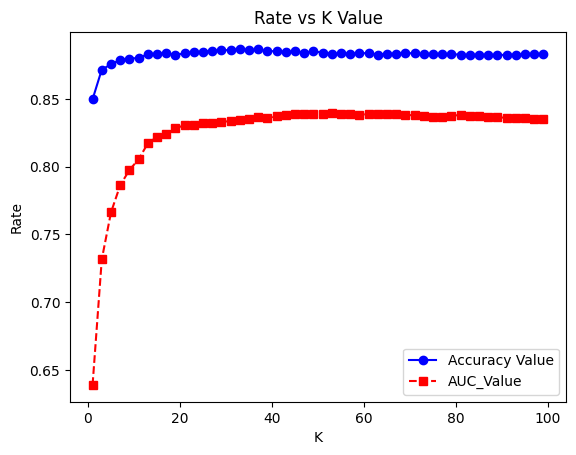

In [ ]:

auc_values = []
accuracy_values = []
cross_val_scores = []


# 取1-50的奇数
ks = list(range(1, 100, 2))
for k in ks:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = run_knn(k)
    # 评估模型
    accuracy = accuracy_score(y_test, y_pred)
    accuracy_values.append(accuracy)

    # 预测概率
    y_pred_prob = knn.predict_proba(X_test)[:, 1]
    # 计算ROC曲线和AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    auc = roc_auc_score(y_test, y_pred_prob)
    auc_values.append(auc)
    print("k: " + str(k) +"    "+ f"Accuracy: {accuracy:.4f}"+"    "+ f"AUC: {auc:.2f}")
    #交叉验证，搜集数据
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cross_val_scores.append(scores.mean())

  # 交叉验证，找到最佳k值
best_k = ks[cross_val_scores.index(max(cross_val_scores))]
print(f"The best value for k is: {best_k}")


plt.plot(ks, accuracy_values, color = "blue", marker='o', linestyle='-', label = "Accuracy Value")
plt.title('Accuracy Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Accuracy Rate')
plt.show()

plt.plot(ks, auc_values, color = "blue", marker='o', linestyle='-', label = "Accuracy Value")
plt.title('AUC Rate vs K Value')
plt.xlabel('K')
plt.ylabel('AUC Rate')
plt.show()

plt.plot(ks, accuracy_values, color = "blue", marker='o', linestyle='-', label = "Accuracy Value")
plt.plot(ks, auc_values, color = "red", marker='s', linestyle='--', label = "AUC_Value")
plt.title('Rate vs K Value')
plt.legend()
plt.xlabel('K')
plt.ylabel('Rate')
plt.show()



ROC曲线和AUC

In [3]:
def get_AUC():
  y_pred_prob = knn.predict_proba(X_test)[:, 1]
  fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
  auc = roc_auc_score(y_test, y_pred_prob)
  print(f"AUC: {auc:.2f}")
  return auc

def plot_ROC_curve(auc):
  plt.figure(figsize=(8, 6))
  plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve \
      (area = {auc:.2f})')
  plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title('Receiver Operating Characteristic (ROC) Curve')
  plt.legend(loc='lower right')
  plt.show()

auc_value = get_AUC()
plot_ROC_curve(auc_value)


NameError: ignored

逻辑回归

In [ ]:

def get_LogisticRegression(threshold = 0.5):
  # S1.Acquire a logistic regression model. The reason to use a
  # logistic regression instead of linearregression model is that we
  # are dealing with a classification problem, where the goal is
  # to categorize data into different classes or labels,instead of
  # predict a continuous numeric value
  logreg = LogisticRegression(max_iter=5000)
  # S2.Train logistic regression classifier and predict data.
  logreg.fit(X_train, y_train)
  y_pred = logreg.predict(X_test)
  # S3.1.Assess the precision of the classifer by using the model.
  log_reg_accuracy = logreg.score(X_test, y_test)
  print(f"Logistic Regression Accuracy: {log_reg_accuracy:.4f}")
  # S3.2.Assess the precision of the classifer by using predicted
  # data.
  print(f"Logistic Regression predict Accuracy: \
     {accuracy_score(y_test, y_pred)}")
  probabilities = logreg.predict_proba(X_test)[:,1]
  print("current threshold: " + str(threshold))
  predictions = [1 if prob >= threshold else 0 for prob \
          in probabilities]
  print(confusion_matrix(y_test, predictions))
  print(classification_report(y_test, predictions))




get_LogisticRegression()
print("===================================================================")
get_LogisticRegression(0.3)

current threshold: 0.5
[[7747  205]
 [ 707  384]]
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      7952
           1       0.65      0.35      0.46      1091

    accuracy                           0.90      9043
   macro avg       0.78      0.66      0.70      9043
weighted avg       0.88      0.90      0.89      9043

current threshold: 0.3
[[7529  423]
 [ 502  589]]
              precision    recall  f1-score   support

           0       0.94      0.95      0.94      7952
           1       0.58      0.54      0.56      1091

    accuracy                           0.90      9043
   macro avg       0.76      0.74      0.75      9043
weighted avg       0.89      0.90      0.90      9043



线性回归

In [ ]:

# 线性回归
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Linear Regression MSE: {mse}")
print(f"Linear Regression R2 Score: {r2}")

# 绘制真实值 vs 预测值
plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("Linear Regression Predictions vs True Values")
plt.show()
